In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [3]:
class AgentState(TypedDict):
    name: str
    age: int
    skills: List[str]

In [18]:
def first_node(state: AgentState) -> AgentState:
    state['name'] += ' welcome to the system!'
    return state

def second_node(state: AgentState) -> AgentState:
    state['age'] = f"you're {state['age']} years old!"
    return state

def third_node(state: AgentState) -> AgentState:
    state['skills'] = "you have skills: " + ", ".join(state['skills'])
    return state

In [19]:
graph = StateGraph(AgentState)
graph.add_node('first', first_node)
graph.add_node('second', second_node)
graph.add_node('third', third_node)
graph.set_entry_point('first')
graph.add_edge('first', 'second')
graph.add_edge('second', 'third')
graph.set_finish_point('third')

app = graph.compile()

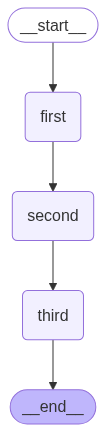

In [20]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
res = app.invoke({'name': " Bob", 'age': 23, 'skills': ['run', 'jump', 'programming']})

In [22]:
res['age'] + ' ' + res['name'] + ' ' + res['skills']

"you're 23 years old!  Bob welcome to the system! you have skills: run, jump, programming"

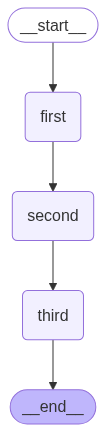

In [23]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))